Generation of simulation dataset from STARmap mouse brain dataset

In [25]:
import squidpy as sq 
import scanpy as sc
import anndata as ad

adata = sc.read_h5ad('gt_starmap.h5ad')

cond_adata = adata[adata.obs['slice_id'] == '1'].copy()

ctrl_adata = cond_adata[cond_adata.obs['Region'].isin([2, 3])].copy()

ctrl_adata.obs['condition'] = 0

cond_adata.obs['condition'] = 1
    
run_adata = ad.concat([ctrl_adata, cond_adata], label='slice_id')

run_adata.obs['condition'] = run_adata.obs['condition'].astype('category')


Apply Taichi

In [44]:
import time
from Taichi.model import Taichi


import scanpy as sc 
import time
import numpy as np
import anndata as ad

start_time = time.time()

model = Taichi(run_adata, ct_obs='ct', slice_id='slice_id')

model.mender_init(scale=4, radius=300, nn_mode='radius')

model.run_mender(n_process=200)

model.label_refinement()

res = model.graph_diffusion()

end_time = time.time()

print(f'Total Running Time {end_time - start_time}')

default number of process is 200


total batch: 2, running batch 0
total batch: 2, running batch 1
scale 0, median #cells per radius (r=300): 5.0
scale 0, median #cells per radius (r=300): 5.0
scale 1, median #cells per radius (r=300): 13.0
scale 2, median #cells per radius (r=300): 21.0
scale 1, median #cells per radius (r=300): 14.0
scale 2, median #cells per radius (r=300): 22.0
Total Running Time 4.844006538391113


Result Visualization

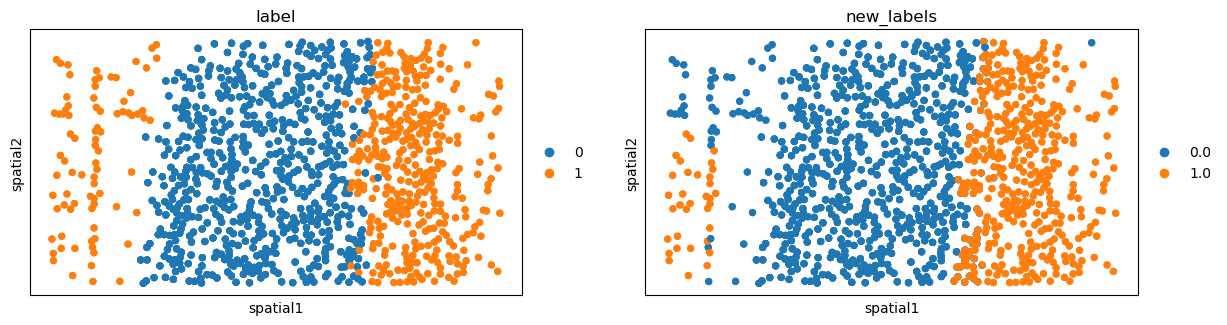

In [45]:
import squidpy as sq 

res.obs['label'] = res.obs['Region'].isin([1, 4]).astype(int).astype('category')

sq.pl.spatial_scatter(res, shape=None, color=['label', 'new_labels'])